#### Important
Pour le fine-tuning çi contre, il faut utiliser un environnement différent de celui utilisé pour l'augmentation des données. Ici il faut les librairies avec les versions çi contre:

- transformers version: 4.41.2
- scikit-learn version: 1.7.1
- un environnement en python 3.12.8
- Torch version: 2.5.1+cpu
- torchvision version: 0.20.1+cu121
- torchaudio version: 2.5.1

In [53]:
import pandas as pd 

# Chargement des données augmentées avec le pivot français
data1 = pd.read_csv("./data/data_augmented_back_translation_en_fr.csv")
data1

,text_final,type_article,thematique,source,text_src,tokens_final,text_cleaned_final
0,Microbial Community Composition Associated wit...,VS,SV,orig,Microbial Community Composition Associated wit...,"['microbial', 'community', 'composition', 'ass...",microbial community composition associated pot...
1,Plant Pathogenic and Endophytic Colletotrichum...,VS,SV,orig,Plant Pathogenic and Endophytic Colletotrichum...,"['plant', 'pathogenic', 'endophytic', 'colleto...",plant pathogenic endophytic colletotrichum fru...
2,Lethal Bronzing: What you should know about th...,VS,SV,orig,Lethal Bronzing: What you should know about th...,"['lethal', 'bronzing', 'know', 'disease', 'tur...",lethal bronzing know disease turn palm tree br...
3,Leaffooted Bug Damage in Almond Orchards Leaff...,VS,SV,orig,Leaffooted Bug Damage in Almond Orchards Leaff...,"['leaffooted', 'bug', 'damage', 'almond', 'orc...",leaffooted bug damage almond orchard leaffoote...
4,Kebbi govt battles mysterious disease affectin...,VS,SV,orig,Kebbi govt battles mysterious disease affectin...,"['kebbi', 'govt', 'battle', 'mysterious', 'dis...",kebbi govt battle mysterious disease affecting...
...,...,...,...,...,...,...,...
2734,"In the case of Alabama, mysterious seeds shoul...",VS,SV,bt,Mystery Seed Packages Appearing Once Again in ...,"['case', 'alabama', 'mysterious', 'seed', 'rep...",case alabama mysterious seed represent agricul...
2735,According to the Ministry of Agriculture and I...,VS,SV,bt,ACES: Mystery seed packages appearing once aga...,"['according', 'ministry', 'agriculture', 'indu...",according ministry agriculture industry alabam...
2736,"In the case of farmers, there is an unpreceden...",VS,SV,bt,Farmers Blame Unknown Pest As Pepper Hits ₦150...,"['case', 'farmer', 'unprecedented', 'increase'...",case farmer unprecedented increase price fresh...
2737,A sharp drop in yield as the mysterious fungal...,VS,SV,bt,Sharp decline in yield as mysterious fungal in...,"['sharp', 'drop', 'yield', 'mysterious', 'fung...",sharp drop yield mysterious fungal infection a...


In [52]:
# Chargement des données augmentées avec le pivot l'allemand
data2 = pd.read_csv("./data/data_augmented_back_translation_en_de.csv")
data2

,text_final,type_article,thematique,source,text_src,tokens_final,text_cleaned_final
0,Microbial Community Composition Associated wit...,VS,SV,orig,Microbial Community Composition Associated wit...,"['microbial', 'community', 'composition', 'ass...",microbial community composition associated pot...
1,Plant Pathogenic and Endophytic Colletotrichum...,VS,SV,orig,Plant Pathogenic and Endophytic Colletotrichum...,"['plant', 'pathogenic', 'endophytic', 'colleto...",plant pathogenic endophytic colletotrichum fru...
2,Lethal Bronzing: What you should know about th...,VS,SV,orig,Lethal Bronzing: What you should know about th...,"['lethal', 'bronzing', 'know', 'disease', 'tur...",lethal bronzing know disease turn palm tree br...
3,Leaffooted Bug Damage in Almond Orchards Leaff...,VS,SV,orig,Leaffooted Bug Damage in Almond Orchards Leaff...,"['leaffooted', 'bug', 'damage', 'almond', 'orc...",leaffooted bug damage almond orchard leaffoote...
4,Kebbi govt battles mysterious disease affectin...,VS,SV,orig,Kebbi govt battles mysterious disease affectin...,"['kebbi', 'govt', 'battle', 'mysterious', 'dis...",kebbi govt battle mysterious disease affecting...
...,...,...,...,...,...,...,...
2734,Mystery Seed Packages Appearing Once Again in ...,VS,SV,bt,Mystery Seed Packages Appearing Once Again in ...,"['mystery', 'seed', 'package', 'appearing', 'a...",mystery seed package appearing alabama mystery...
2735,ACES: Mystery Seed Packages Reappearing in Ala...,VS,SV,bt,ACES: Mystery seed packages appearing once aga...,"['ace', 'mystery', 'seed', 'package', 'reappea...",ace mystery seed package reappearing alabama a...
2736,Farmers blame unknown pests for the shortage o...,VS,SV,bt,Farmers Blame Unknown Pest As Pepper Hits ₦150...,"['farmer', 'blame', 'unknown', 'pest', 'shorta...",farmer blame unknown pest shortage pepper coun...
2737,Sharp drop in yield due to a mysterious fungal...,VS,SV,bt,Sharp decline in yield as mysterious fungal in...,"['sharp', 'drop', 'yield', 'due', 'mysterious'...",sharp drop yield due mysterious fungal infecti...


### Commentaire

En fonction de la langue pivot utilisée, nous avons des résultats différents 

In [55]:
# conservation des indexes dans des fichiers séparés pour le train, val et test

import numpy as np
from sklearn.model_selection import train_test_split

SEED = 42
N = len(data2)

idx_all = np.arange(N)
y = data2["type_article"].to_numpy()


idx_train, idx_temp, y_train_tmp, y_temp_tmp = train_test_split(
    idx_all, y, test_size=0.3, stratify=y, random_state=SEED
)
idx_val, idx_test, _, _ = train_test_split(
    idx_temp, y_temp_tmp, test_size=0.3, stratify=y_temp_tmp, random_state=SEED
)

np.save("splits_idx_train.npy", idx_train)
np.save("splits_idx_val.npy",   idx_val)
np.save("splits_idx_test.npy",  idx_test)
print(len(idx_train), len(idx_val), len(idx_test))


1917 575 247


Classes: ['NVS', 'VS']


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at sentence-transformers/all-MiniLM-L6-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/rosalie/miniforge3/envs/sursy/lib/python3.12/site-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Device: cuda | CUDA=True | Num GPUs: 1 | bf16=False | fp16=False | dtype=torch.float32


Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro,Precision Macro,Recall Macro
1,No log,0.456625,0.819130,0.450287,0.409565,0.500000
2,No log,0.174001,0.940870,0.903778,0.890494,0.918953
3,No log,0.124334,0.958261,0.925592,0.952635,0.903346
4,No log,0.110077,0.972174,0.951957,0.962959,0.941808
5,No log,0.180550,0.954783,0.928883,0.903932,0.961161
6,No log,0.100121,0.975652,0.959811,0.950244,0.970154
7,No log,0.128798,0.973913,0.955134,0.964243,0.946615
8,No log,0.153641,0.966957,0.946417,0.930435,0.964846
9,No log,0.151585,0.973913,0.954425,0.971711,0.939123


   epoch  train_loss  train_accuracy  train_f1_macro  train_precision_macro  \
0      1    0.456725        0.817945        0.449928               0.408972   
1      2    0.160896        0.948357        0.916157               0.903413   
2      3    0.077715        0.978091        0.962020               0.978132   
3      4    0.044823        0.988002        0.979653               0.984633   
4      5    0.049644        0.986437        0.977722               0.967866   
5      6    0.014773        0.996348        0.993876               0.993328   
6      7    0.007247        0.998435        0.997370               0.997926   
7      8    0.007387        0.998435        0.997376               0.996824   
8      9    0.140649        0.999478        0.999123               0.999681   

   train_recall_macro  eval_loss  eval_accuracy  eval_f1_macro  
0            0.500000   0.456625       0.819130       0.450287  
1            0.930562   0.174001       0.940870       0.903778  
2            0

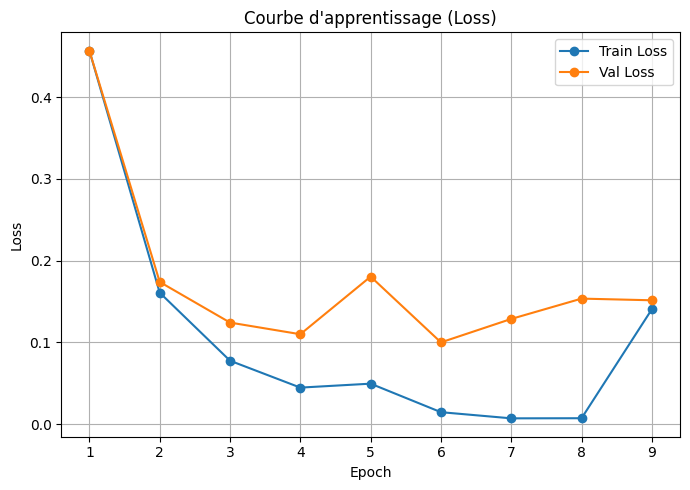

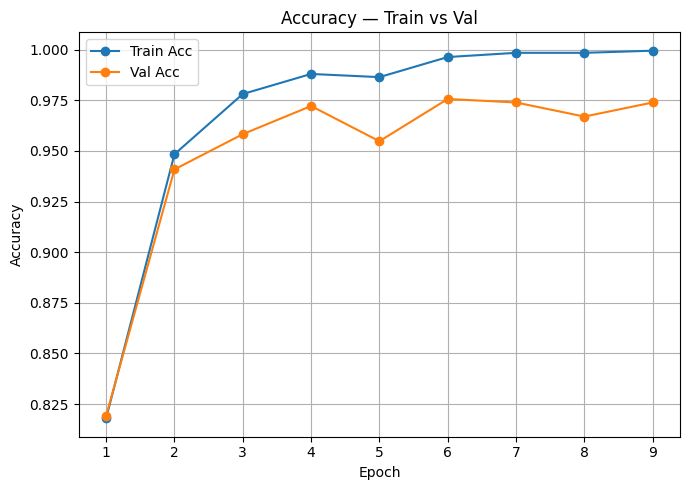

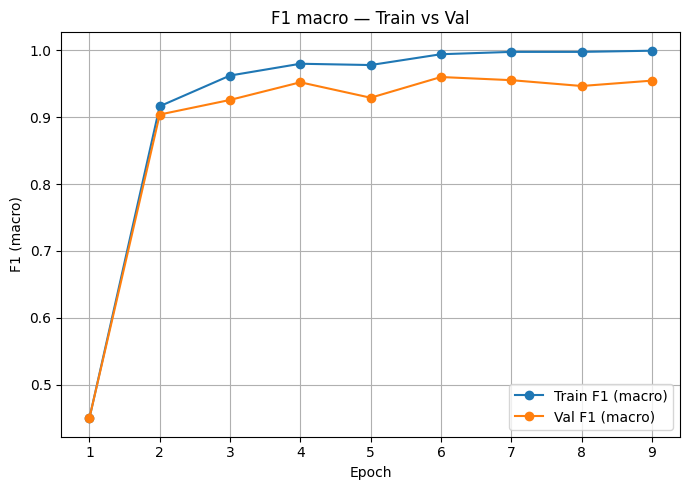


=== Rapport de classification (TEST) ===
              precision    recall  f1-score   support

         NVS       0.98      0.99      0.98       202
          VS       0.93      0.91      0.92        45

    accuracy                           0.97       247
   macro avg       0.96      0.95      0.95       247
weighted avg       0.97      0.97      0.97       247



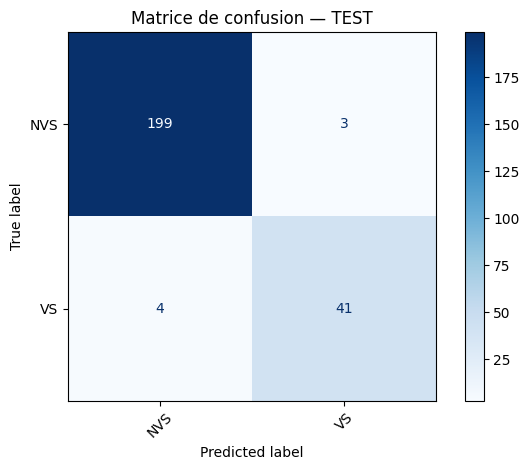

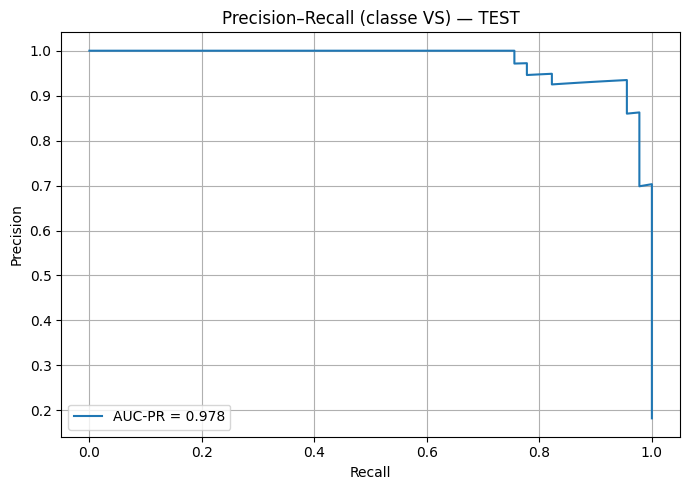


Best checkpoint: ./results_SBERT/checkpoint-720


In [56]:
# =========================
# 0) Imports & seed
# =========================
import os, json, joblib, random
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    precision_recall_curve, average_precision_score,
    f1_score, precision_score, recall_score, accuracy_score
)
from sklearn.model_selection import train_test_split

from torch.utils.data import Dataset
from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    Trainer, TrainingArguments, TrainerCallback, EarlyStoppingCallback, set_seed
)

# -------------------------
# Réglages de base
# -------------------------
SEED = 42
set_seed(SEED)  # gère random/np/torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

try:
    torch.set_float32_matmul_precision("high")
except Exception:
    pass

# Toggle pour (dé)activer la mixed precision au cas où on voudra tester le GPU plus tard
USE_MIXED_PRECISION = False
use_bf16 = USE_MIXED_PRECISION and torch.cuda.is_available() and torch.cuda.is_bf16_supported()
use_fp16 = USE_MIXED_PRECISION and torch.cuda.is_available() and (not use_bf16)

# =========================
# 1) Données & splits
# =========================
X_all = data2["text_final"].astype(str).to_numpy()
y_all = data2["type_article"].to_numpy()

# Encodage labels
label_encoder = LabelEncoder()
y_enc = label_encoder.fit_transform(y_all)
num_classes = len(label_encoder.classes_)
print("Classes:", list(label_encoder.classes_))

# Charger des splits si dispo, sinon les créer et les sauvegarder
split_dir = "."
paths = [os.path.join(split_dir, "splits_idx_train.npy"),
         os.path.join(split_dir, "splits_idx_val.npy"),
         os.path.join(split_dir, "splits_idx_test.npy")]

if all(os.path.isfile(p) for p in paths):
    idx_train = np.load(paths[0]); idx_val = np.load(paths[1]); idx_test = np.load(paths[2])
else:
    idx = np.arange(len(X_all))
    idx_train, idx_temp, y_train_idx, y_temp_idx = train_test_split(
        idx, y_enc, test_size=0.4, random_state=SEED, stratify=y_enc
    )
    idx_val, idx_test, _, _ = train_test_split(
        idx_temp, y_temp_idx, test_size=0.5, random_state=SEED, stratify=y_temp_idx
    )
    np.save(paths[0], idx_train); np.save(paths[1], idx_val); np.save(paths[2], idx_test)

X_train, X_val, X_test = X_all[idx_train], X_all[idx_val], X_all[idx_test]
y_train, y_val, y_test = y_enc[idx_train], y_enc[idx_val], y_enc[idx_test]

# =========================
# 2) Tokenizer & modèle
# =========================
model_name = "sentence-transformers/all-MiniLM-L6-v2"
tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=True)

id2label = {i: c for i, c in enumerate(label_encoder.classes_)}
label2id = {c: i for i, c in enumerate(label_encoder.classes_)}

model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=len(label_encoder.classes_),
    id2label=id2label,
    label2id=label2id,
)

model.to(device)

# =========================
# 3) Dataset PyTorch (robuste)
# =========================
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=256):
        if isinstance(texts, np.ndarray):
            texts = texts.tolist()
        self.texts = [
            "" if (t is None or (isinstance(t, float) and np.isnan(t))) else str(t)
            for t in texts
        ]
        self.encodings = tokenizer(self.texts, truncation=True, padding=True, max_length=max_length)
        # labels doivent être des entiers (déjà encodés)
        self.labels = labels.tolist() if isinstance(labels, np.ndarray) else list(labels)
        assert len(self.texts) == len(self.labels)

    def __len__(self): 
        return len(self.labels)

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

train_ds = TextDataset(X_train, y_train, tokenizer)
val_ds   = TextDataset(X_val,   y_val,   tokenizer)
test_ds  = TextDataset(X_test,  y_test,  tokenizer)

# =========================
# 4) Metrics + callback train
# =========================
def compute_metrics(eval_pred):
    # HF récent: EvalPrediction(predictions=..., label_ids=...)
    logits = eval_pred.predictions if not hasattr(eval_pred, "predictions") else eval_pred.predictions
    labels = eval_pred.label_ids if not hasattr(eval_pred, "label_ids") else eval_pred.label_ids
    preds = np.argmax(logits, axis=1)
    return {
        "accuracy": accuracy_score(labels, preds),
        "f1_macro": f1_score(labels, preds, average="macro"),
        "precision_macro": precision_score(labels, preds, average="macro", zero_division=0),
        "recall_macro": recall_score(labels, preds, average="macro", zero_division=0),
    }

class TrainEvalCallback(TrainerCallback):
    """Calcule et logue les métriques TRAIN sans déclencher on_evaluate (donc pas de conflit avec l'early stopping)."""
    def __init__(self, trainer, train_dataset):
        self.trainer = trainer
        self.train_dataset = train_dataset

    def on_epoch_end(self, args, state, control, **kwargs):
        # predict() déclenche on_predict, pas on_evaluate → l'early stopping ne s'en mêle pas
        pred_out = self.trainer.predict(self.train_dataset, metric_key_prefix="train")
        # pred_out.metrics contient déjà les clés train_* si compute_metrics est défini
        metrics = {k: float(v) for k, v in pred_out.metrics.items()
                   if isinstance(v, (int, float, np.floating))}
        # Ajoute l'epoch pour ton tableau
        if state.epoch is not None:
            metrics["epoch"] = float(state.epoch)
        # Pousse dans le log_history du Trainer
        self.trainer.log(metrics)
        return control


# =========================
# 5) TrainingArguments + Trainer
# =========================
training_args = TrainingArguments(
    output_dir="./results_SBERT",
    num_train_epochs=20,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,

    # évaluation/sauvegarde par epoch + meilleur modèle
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="eval_f1_macro",   # <- DOIT correspondre à compute_metrics
    greater_is_better=True,

    # optim & régularisation douce (aide à la généralisation)
    learning_rate=2e-5,
    weight_decay=0.01,
    warmup_ratio=0.1,

    # logs
    logging_dir="./logs_SBERT",
    logging_strategy="epoch",
    report_to="none",
    save_total_limit=3,
    seed=SEED,

    # même réglages CPU/GPU pour comparaison propre
    dataloader_pin_memory=True,
    dataloader_num_workers=4,
    gradient_checkpointing=False,

    # précision
    bf16=use_bf16,
    fp16=use_fp16,
    gradient_accumulation_steps=1,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
    callbacks=[
        EarlyStoppingCallback(early_stopping_patience=3),  # un seul early-stopping
    ]
)

# Callback pour logs train_*
trainer.add_callback(TrainEvalCallback(trainer, train_ds))

# =========================
# 6) Entraînement
# =========================
print(f"Device: {device} | CUDA={torch.cuda.is_available()} | "
      f"Num GPUs: {torch.cuda.device_count()} | "
      f"bf16={use_bf16} | fp16={use_fp16} | dtype={next(model.parameters()).dtype}")
trainer.train()

# =========================
# 7) Table par epoch + tracés
# =========================
def epoch_table(log_hist):
    rows = {}
    for rec in log_hist:
        if "epoch" not in rec:
            continue
        e = int(round(float(rec["epoch"])))
        if e not in rows:
            rows[e] = {}
        for k, v in rec.items():
            if k.startswith(("eval_", "train_")):
                rows[e][k] = v
    df = (pd.DataFrame.from_dict(rows, orient="index")
            .sort_index()
            .reset_index()
            .rename(columns={"index": "epoch"}))
    keep = [c for c in [
        "epoch",
        "train_loss","train_accuracy","train_f1_macro","train_precision_macro","train_recall_macro",
        "eval_loss","eval_accuracy","eval_f1_macro"
    ] if c in df.columns]
    return df[keep]

tbl = epoch_table(trainer.state.log_history)
print(tbl)

# Tracés "safe"
def _safe_plot(x, y, label):
    s = pd.Series(y)
    if s.notna().any():
        plt.plot(x, y, marker="o", label=label)

if len(tbl):
    plt.figure(figsize=(7,5))
    if "train_loss" in tbl.columns: _safe_plot(tbl["epoch"], tbl["train_loss"], "Train Loss")
    if "eval_loss"  in tbl.columns: _safe_plot(tbl["epoch"], tbl["eval_loss"],  "Val Loss")
    plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.title("Courbe d'apprentissage (Loss)")
    plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

    plt.figure(figsize=(7,5))
    if "train_accuracy" in tbl.columns: _safe_plot(tbl["epoch"], tbl["train_accuracy"], "Train Acc")
    if "eval_accuracy"  in tbl.columns: _safe_plot(tbl["epoch"], tbl["eval_accuracy"],  "Val Acc")
    plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.title("Accuracy — Train vs Val")
    plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

    plt.figure(figsize=(7,5))
    if "train_f1_macro" in tbl.columns: _safe_plot(tbl["epoch"], tbl["train_f1_macro"], "Train F1 (macro)")
    if "eval_f1_macro"  in tbl.columns: _safe_plot(tbl["epoch"], tbl["eval_f1_macro"],  "Val F1 (macro)")
    plt.xlabel("Epoch"); plt.ylabel("F1 (macro)"); plt.title("F1 macro — Train vs Val")
    plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

# =========================
# 8) Évaluation finale sur TEST
# =========================
# À ce stade, trainer.model est déjà le "best model" (load_best_model_at_end=True)
preds_test = trainer.predict(test_ds)
y_pred = np.argmax(preds_test.predictions, axis=1)
y_scores = torch.softmax(torch.tensor(preds_test.predictions), dim=1).numpy()

print("\n=== Rapport de classification (TEST) ===")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap="Blues")
plt.xticks(rotation=45)
plt.title("Matrice de confusion — TEST")
plt.tight_layout()
plt.show()

# Courbe PR pour "VS" si présent
classes = list(label_encoder.classes_)
if "VS" in classes:
    vs_idx = classes.index("VS")
    y_true_bin = (y_test == vs_idx).astype(int)
    y_prob_vs = y_scores[:, vs_idx]
    precision, recall, _ = precision_recall_curve(y_true_bin, y_prob_vs)
    auc_pr = average_precision_score(y_true_bin, y_prob_vs)
    plt.figure(figsize=(7,5))
    plt.plot(recall, precision, label=f"AUC-PR = {auc_pr:.3f}")
    plt.xlabel("Recall"); plt.ylabel("Precision")
    plt.title("Precision–Recall (classe VS) — TEST")
    plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()
else:
    print("La classe 'VS' n'est pas présente dans les labels. PR-curve sautée.")

# =========================
# 9) Sauvegardes
# =========================
save_dir = "results_SBERT"
os.makedirs(save_dir, exist_ok=True)

trainer.model.save_pretrained(save_dir)
tokenizer.save_pretrained(save_dir)
joblib.dump(label_encoder, os.path.join(save_dir, "label_encoder.joblib"))

tbl.to_csv(os.path.join(save_dir, "learning_curves.csv"), index=False)
with open(os.path.join(save_dir, "log_history.json"), "w", encoding="utf-8") as f:
    json.dump(trainer.state.log_history, f, ensure_ascii=False, indent=2)

print("\nBest checkpoint:", trainer.state.best_model_checkpoint)


### Résultats: 
- Avec français comme langue pivot  : nous avons AUC-PR = 0.97; F1-score de VS donne 0.91
- Avec l'allemand comme langue pivot : nous avons AUC-PR = 0.97; F-score de VS donne 0.92

Durant le fine-tuning de la phase 2, nous avions eu ces résultats: AUC-PR = 0.95; F1-score de VS donne 0.91

In [58]:
import torch
import joblib
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import numpy as np

# === Charger label encoder et modèle fine-tuné ===
label_encoder = joblib.load("results_SBERT/label_encoder.joblib")  
classes = list(label_encoder.classes_)

model_path = "./results_SBERT/best_checkpoint" 
tokenizer = AutoTokenizer.from_pretrained(model_path, use_fast=True)
model = AutoModelForSequenceClassification.from_pretrained(model_path)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

# === Phrases brutes ===
phrases = [
    "Authorities reported an outbreak of a mysterious disease affecting cattle, with new cases detected in nearby farms.",
    "Veterinarians notified the ministry about a cluster of unexplained illness in goats; several more cases were found during inspections.",
    "A national program was launched to improve cattle breeding and milk production, with training provided to local farmers.",
    "Researchers developed a new irrigation system to increase rice yields and reduce water usage in agricultural fields."
]

# === Tokenisation identique à l'entraînement ===
encodings = tokenizer(phrases, truncation=True, padding=True, max_length=256, return_tensors="pt").to(device)

# === Prédictions ===
with torch.no_grad():
    outputs = model(**encodings)
    probs = torch.softmax(outputs.logits, dim=1).cpu().numpy()
pred_indices = np.argmax(probs, axis=1)
pred_labels = label_encoder.inverse_transform(pred_indices)

# === Affichage ===
for i, phrase in enumerate(phrases):
    proba_dict = {classes[j]: round(float(probs[i][j]), 4) for j in range(len(classes))}
    print(f"\nTexte: {phrase}")
    print(f"-> Classe prédite: {pred_labels[i]}")
    print(f"-> Probabilités: {proba_dict}")



Texte: Authorities reported an outbreak of a mysterious disease affecting cattle, with new cases detected in nearby farms.
-> Classe prédite: VS
-> Probabilités: {'NVS': 0.1798, 'VS': 0.8202}

Texte: Veterinarians notified the ministry about a cluster of unexplained illness in goats; several more cases were found during inspections.
-> Classe prédite: VS
-> Probabilités: {'NVS': 0.4443, 'VS': 0.5557}

Texte: A national program was launched to improve cattle breeding and milk production, with training provided to local farmers.
-> Classe prédite: NVS
-> Probabilités: {'NVS': 0.9903, 'VS': 0.0097}

Texte: Researchers developed a new irrigation system to increase rice yields and reduce water usage in agricultural fields.
-> Classe prédite: NVS
-> Probabilités: {'NVS': 0.9797, 'VS': 0.0203}


### Commentaire
Nous constatons que l'auto-traduction en prenant l'allemand comme langue pivot semble donner de meilleurs résultats 

#### Connaitre toute les versions des librairies utilisées ici pour la phase 3

Nous avons crée un environnement virtuel avec python 3.12.8

In [59]:
!pip freeze > requirements.txt
